In [1]:
# 第 3 章のプログラムは，事前に下記が実行されていることを仮定する。
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

## 38

In [2]:
def Hermite(j):
    if j == 0:
        return [1]
    a = [0] * (j + 2)
    b = [0] * (j + 2)
    a[0] = 1
    for i in range(1, j + 1):
        b[0] = -a[1]
        for k in range(i + 1):
            b[k] = 2 * a[k - 1] - (k + 1) * a[k + 1]
        for h in range(j + 2):
            a[h] = b[h]
    return b[:(j+1)]


In [3]:
def H(j, x):
    coef = Hermite(j)
    S = 0
    for i in range(j + 1):
        S = S + np.array(coef[i]) * (x ** i)
    return S

Text(0.5, 1.0, 'Characteristic function of Gauss Kernel')

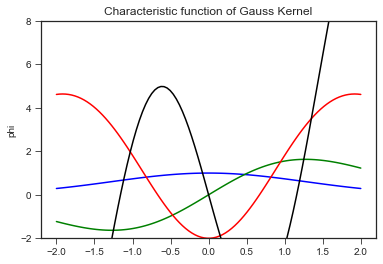

In [4]:
sigma = 1
sigma_hat = 1

def phi(j, x, sigma=1, sigma_hat=1):
    a = 1/(4*sigma_hat**2)
    b = 1/(2*sigma**2)
    cc = np.sqrt(a**2 + 2*a*b)
    return np.exp(-(cc - a) * x**2) * H(j, np.sqrt(2 * cc) * x)


color = ["b", "g", "r", "k"]
p = [[] for _ in range(4)]
x = np.linspace(-2, 2, 100)
for i in range(4):
    for k in x:
        p[i].append(phi(i, k, sigma, sigma_hat))
    plt.plot(x, p[i], c=color[i], label="j = %d" % i)
plt.ylim(-2, 8)
plt.ylabel("phi")
plt.title("Characteristic function of Gauss Kernel")

## 42

<ipython-input-5-145df3228af5>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[:, i] = vectors[i, :] * np.sqrt(m) / (values[i] + 10e-16)


eigen value :  (45.78948642004862+0j)


Text(0.5, 1.0, 'Eigen Values and their Eigen Functions')

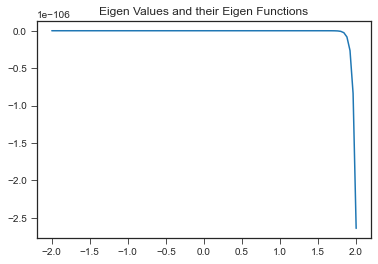

In [5]:
# カーネルの定義
sigma = 1


def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)


# サンプルの発生とグラム行列の設定
m = 300
x = np.random.randn(m) - 2 * np.random.randn(m)**2 + 3 * np.random.randn(m)**3


def eigen(x, k, ith):
    # 固有値と固有ベクトル
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = k(x[i], x[j])
        values, vectors = np.linalg.eig(K)
        lam = values / m
        alpha = np.zeros((m, m))
        for i in range(m):
            alpha[:, i] = vectors[i, :] * np.sqrt(m) / (values[i] + 10e-16)


    # グラフの表示
    def F(y, i):
        S = 0
        for j in range(m):
            S = S + alpha[j, i] * k(x[j], y)
            return S



    def G(y):
        return F(y, ith)
    
    return G, values[ith]


w = np.linspace(-2, 2, 100)
eigen_fun, eigen_val = eigen(x, k, 1)
print('eigen value : ', eigen_val)
plt.plot(w, eigen_fun(w))
plt.title("Eigen Values and their Eigen Functions")

In [6]:
def k(x,y):
    return (1+np.dot(x,y))**2

<ipython-input-5-145df3228af5>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[:, i] = vectors[i, :] * np.sqrt(m) / (values[i] + 10e-16)


eigen value :  (86246.02689572684+0j)


Text(0.5, 1.0, 'Eigen Values and their Eigen Functions')

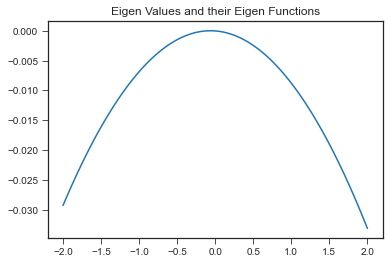

In [7]:
w = np.linspace(-2, 2, 100)
eigen_fun, eigen_val = eigen(x, k, 1)
print('eigen value : ', eigen_val)
plt.plot(w, eigen_fun(w))
plt.title("Eigen Values and their Eigen Functions")